## Importing All The Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier

from sklearn.metrics import f1_score,precision_score,recall_score

import joblib
import streamlit as st

In [2]:
df=pd.read_csv('news.csv')
print(df.shape)
print()
df.info()

(6335, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [3]:
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df['label']=df['label'].astype('category')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  6335 non-null   int64   
 1   title       6335 non-null   object  
 2   text        6335 non-null   object  
 3   label       6335 non-null   category
dtypes: category(1), int64(1), object(2)
memory usage: 154.9+ KB


In [6]:
x=df['text'].values
y=df.label

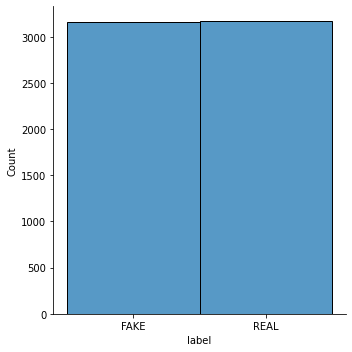

In [7]:
sns.displot(y)

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
x_train.shape,y_train.shape

((4751,), (4751,))

## Using a TfidfVectorizer

In [9]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)
tfidf_train=tfidf_vectorizer.fit_transform(x_train)
tfidf_test=tfidf_vectorizer.transform(x_test)

In [10]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [11]:
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 93.62%


In [12]:
conf_mat=confusion_matrix(y_test, y_pred)
conf_mat

array([[748,  46],
       [ 55, 735]], dtype=int64)

<AxesSubplot:>

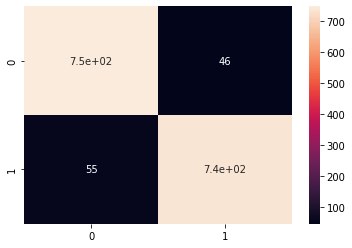

In [13]:
sns.heatmap(conf_mat,annot=True)

<AxesSubplot:>

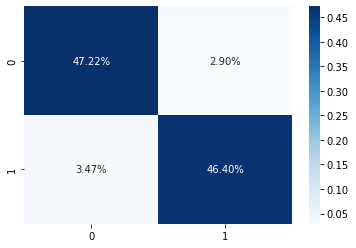

In [14]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True,fmt='.2%', cmap='Blues')

## Using count vectorization

In [15]:
CV=CountVectorizer(stop_words='english')
vect_x_train=CV.fit_transform(x_train)
vect_x_test=CV.transform(x_test)

print(vect_x_train.shape)
print(vect_x_test.shape)

(4751, 59568)
(1584, 59568)


## Applying SVM algorithm without pipeline

In [16]:
model1= SVC()
model1.fit(vect_x_train,y_train)

SVC()

In [17]:
y_pred1=model1.predict(vect_x_test)
y_pred1

array(['FAKE', 'FAKE', 'FAKE', ..., 'FAKE', 'FAKE', 'REAL'], dtype=object)

In [18]:
score=accuracy_score(y_pred1,y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.82%


In [19]:
conf_mat=confusion_matrix(y_test, y_pred1)
conf_mat

array([[744,  50],
       [143, 647]], dtype=int64)

<AxesSubplot:>

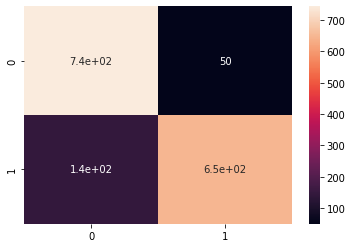

In [20]:
sns.heatmap(conf_mat,annot=True)

<AxesSubplot:>

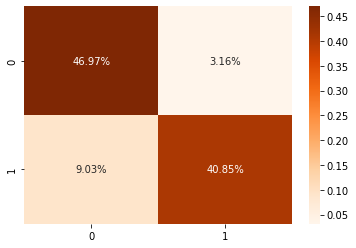

In [21]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True,fmt='.2%', cmap='Oranges')

## Applying SVM algorithm with pipeline

In [22]:
model2=make_pipeline(CountVectorizer(),SVC())
model2.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()), ('svc', SVC())])

In [23]:
y_pred2=model2.predict(x_test)
score=accuracy_score(y_pred2,y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.48%


In [24]:
conf_mat=confusion_matrix(y_test, y_pred2)
conf_mat

array([[741,  53],
       [177, 613]], dtype=int64)

<AxesSubplot:>

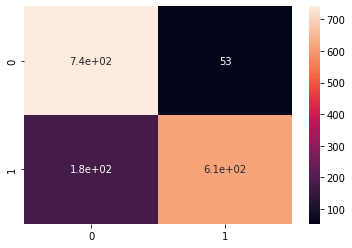

In [25]:
sns.heatmap(conf_mat,annot=True)

<AxesSubplot:>

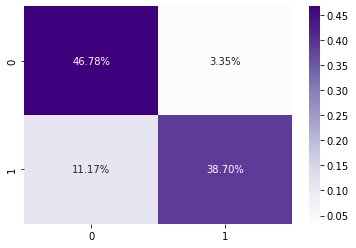

In [26]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True,fmt='.2%', cmap='Purples')

## Applying Naive Baye's algorithm without pipeline

In [27]:
model3=MultinomialNB()
model3.fit(vect_x_train,y_train)

MultinomialNB()

In [28]:
y_pred3=model3.predict(vect_x_test)
score=accuracy_score(y_pred3,y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 88.95%


In [29]:
conf_mat=confusion_matrix(y_test, y_pred3)
conf_mat

array([[678, 116],
       [ 59, 731]], dtype=int64)

<AxesSubplot:>

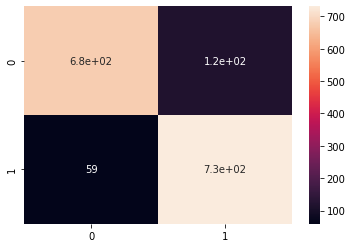

In [30]:
sns.heatmap(conf_mat,annot=True)

<AxesSubplot:>

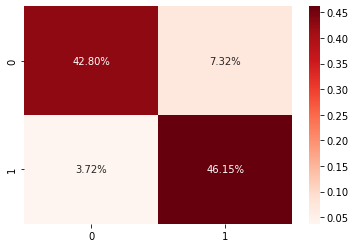

In [31]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True,fmt='.2%', cmap='Reds')

## Applying Naive Baye's algorithm with pipeline

In [32]:
model4=make_pipeline(CountVectorizer(),MultinomialNB())
model4.fit(x_train,y_train)

Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('multinomialnb', MultinomialNB())])

In [33]:
y_pred4=model4.predict(x_test)
score=accuracy_score(y_pred4,y_test)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 88.95%


In [34]:
conf_mat=confusion_matrix(y_test, y_pred4)
conf_mat

array([[680, 114],
       [ 61, 729]], dtype=int64)

<AxesSubplot:>

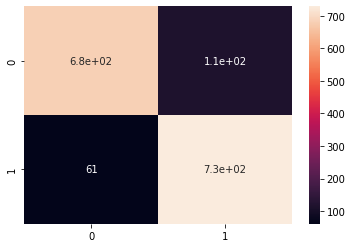

In [35]:
sns.heatmap(conf_mat,annot=True)

<AxesSubplot:>

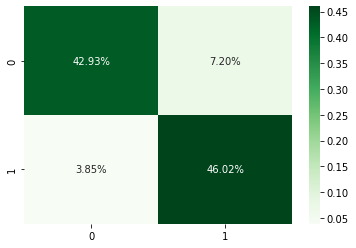

In [36]:
sns.heatmap(conf_mat/np.sum(conf_mat), annot=True,fmt='.2%', cmap='Greens')

In [37]:
joblib.dump(pac,'Fake News Detection System')

['Fake News Detection System']

In [38]:
text_model=joblib.load('Fake News Detection System')

In [39]:
a=tfidf_vectorizer.transform(['U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week'])
b=tfidf_vectorizer.transform(['''Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center,
                                is a New York writer focusing on radical Islam
                              \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI.'''])
print(text_model.predict(a))
print(text_model.predict(b))

['REAL']
['FAKE']


In [41]:
%%writefile app.py
import streamlit as st
import joblib
st.title('Fake News Detection System')
ip=st.text_input("Enter the Text :")
ip=[ip]
ip=tfidf_vectorizer.transform(ip)
op=text_model.predict(aaa)
if st.button('Predict'):
    st.title("This News is:")
    st.title(op[0])

Overwriting app.py


In [ ]:
!streamlit run app.py